# Data Load


In [68]:
import numpy as np
import pandas as pd

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
#%matplotlib tk

#import matplotlib 
#matplotlib.font_manager._rebuild()

In [70]:
# 한글 폰트가 깨지면 실행하세요! 
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext='ttf')
# 아래 주석을 지워서 폰트 리스트를 확인하고 한글 폰트를 font_path에 추가합니다
fontlist[:]

from matplotlib import font_manager, rc
#font_path = 'C:\\Users\\mtang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [71]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data_big.csv")

# original data -> data
data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price
0,201709,24432350113,친쿡부대찌개 오류동본점,뷔페,고기 뷔페,126.84,37.50,12881013.37,21514
1,201709,13141330215,드럼통집,뷔페,고기 뷔페,127.10,37.51,33931612.72,52264
2,201706,39421720107,하우돈,뷔페,고기 뷔페,126.91,37.52,21456513.16,42656
3,201706,4602500509,고고생고기,뷔페,고기 뷔페,127.11,37.50,6140707.30,34561
4,201709,39313780106,현대식당,뷔페,고기 뷔페,126.98,37.52,6091482.50,38423
...,...,...,...,...,...,...,...,...,...
2927734,201803,66340980106,최가네 남원추어탕,수산물,회/수산물 일반,126.96,37.53,13693767.90,21511
2927735,201803,7211800169,우미도라꾸,수산물,회/수산물 일반,127.07,37.54,17432801.29,74559
2927736,201804,7408500552,연안해물칼국수 행당점,수산물,회/수산물 일반,127.03,37.56,17023101.74,34212
2927737,201803,36412610212,동해수산,수산물,회/수산물 일반,127.13,37.54,31533908.77,52973


# EDA 

2,927,739 rows X 9 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음) -> 군집화, labeling 필요
  - shop_type_big -> 15 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 61 category

- 매출 정보
  - date -> 24 category, 201606~ 201805 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보-> X

In [72]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927739 entries, 0 to 2927738
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                int64  
 1   shop_code           int64  
 2   shop_name           object 
 3   shop_type_big       object 
 4   shop_type_small     object 
 5   longitude           float64
 6   latitude            float64
 7   monthly_gain        float64
 8   average_sale_price  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 201.0+ MB


In [74]:
print(data['shop_type_big'].unique())
print(data['shop_type_big'].nunique())
print(data['shop_type_small'].unique())
print(data['shop_type_small'].nunique())
print(data['shop_name'].nunique())
print(data['shop_code'].nunique())
print(data['date'].unique())
print(data['date'].nunique())

['뷔페' '한식' '분식' '별식/퓨전요리' '수산물' '일식' '패스트푸드' '제과제빵떡케익' '중식' '유흥주점' '소매'
 '생활서비스' '양식' '음식-미분류' '다방/커피숍/카페']
15
['고기 뷔페' '고기구이/육회 전문점' '곱창/양구이 전문점' '구내식당' '국수/수제비 전문점' '기타세계요리 전문점'
 '낙지/문어/오징어/쭈꾸미 전문점' '냉면 전문점' '덮밥/가정식' '도너츠/꽈배기/고로케/호떡 전문점'
 '도시락/컵밥/주먹밥/배달음식 전문점' '돈가스 전문점' '떡/한과 전문점' '마라/양꼬치/훠궈 전문점' '면 전문점'
 '미분류 유흥업소' '민속주점' '바닷가재/게요리 전문점' '반찬 판매' '백화점' '버거 전문점' '베트남음식 전문점'
 '보쌈/족발 전문점' '분식 전문점' '샌드위치/토스트/핫도그 전문점' '샤브샤브 전문점' '세탁소' '소주방/포장마차'
 '순대 전문점' '슈퍼/잡화/할인매장' '스테이크 전문점' '식료품' '아이스크림/빙수 판매' '오리/닭요리 전문점'
 '오리/닭요리/탕/백숙 전문점' '와인/칵테일/위스키 바' '음식-미분류' '이자까야/꼬치구이' '이태리 전문점'
 '인도음식 전문점' '일반 중식당' '장어 전문점' '전통찻집' '제과/제빵 전문점' '조개 전문점' '종합 뷔페'
 '죽요리 전문점' '참치 전문점' '초밥 전문점' '치킨/닭강정 전문점' '카레 전문점' '카페/디저트' '테이크아웃 음료 전문점'
 '편의점' '퓨전음식 전문점' '피자 전문점' '한식국물요리 전문점' '한정식/백반 전문점' '호프/맥주' '화로구이 전문점'
 '회/수산물 일반']
61
131631
170058
[201709 201706 201707 201708 201711 201712 201710 201801 201610 201701
 201612 201611 201703 201705 201704 201702 201606 201607 201608 201609
 201803 201804 201802 201805]
24


In [75]:
check_df = data.groupby('shop_code')['shop_name'].nunique().to_frame('shop_name_unique').reset_index()

check_df2 = check_df[check_df['shop_name_unique'] > 1]
check_df2

,shop_code,shop_name_unique
161,105500801,2
266,118100526,2
499,148500219,2
597,158700791,2
1176,228500370,3
...,...,...
169473,99270740120,2
169649,99488110116,16
169739,99598610607,2
169769,99638190109,2


In [76]:
# 1120개의 가게가 평균 3번 최대 338번 업종명을 바꿈 
check_df2['shop_name_unique'].describe()

count   1120.00
mean       3.80
std       13.09
min        2.00
25%        2.00
50%        2.00
75%        2.00
max      338.00
Name: shop_name_unique, dtype: float64

In [77]:
# 결측치는 없는 것으로 확인됨
print(len(input_data['shop_type_big'].unique()))
print(input_data['shop_type_big'].isnull().value_counts())
print(len(input_data['shop_type_small'].unique()))
print(input_data['shop_type_small'].isnull().value_counts())

15
False    2927739
Name: shop_type_big, dtype: int64
61
False    2927739
Name: shop_type_small, dtype: int64


In [78]:
pd.set_option('display.float_format', '{:.2f}'.format) 
pd.DataFrame(input_data['average_sale_price']).describe()

,average_sale_price
count,2927739.00
mean,38070.06
std,182821.78
min,1.00
25%,9246.00
50%,20280.00
75%,38600.00
max,165260550.00


In [82]:
df_check = data[['monthly_gain','shop_type_small','shop_type_big', 'average_sale_price']].copy()

<AxesSubplot:xlabel='shop_type_big', ylabel='monthly_gain'>

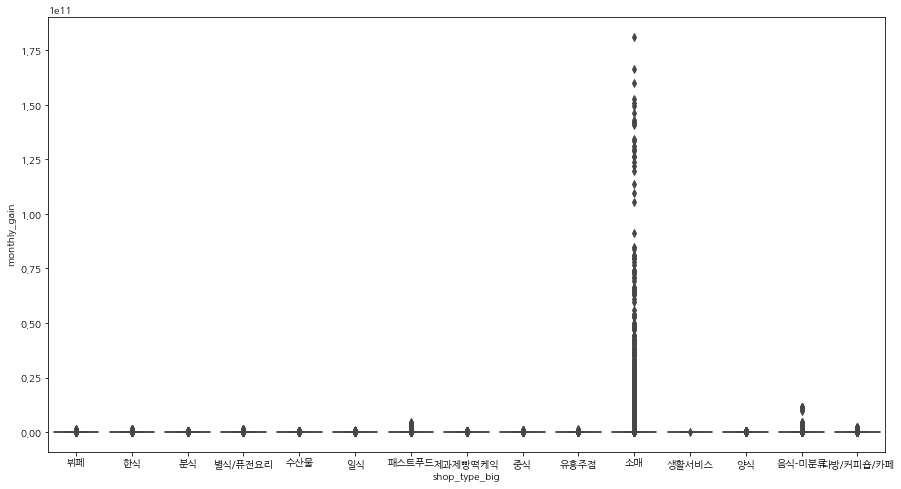

In [83]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='monthly_gain', data=df_check)

<AxesSubplot:xlabel='shop_type_big', ylabel='average_sale_price'>

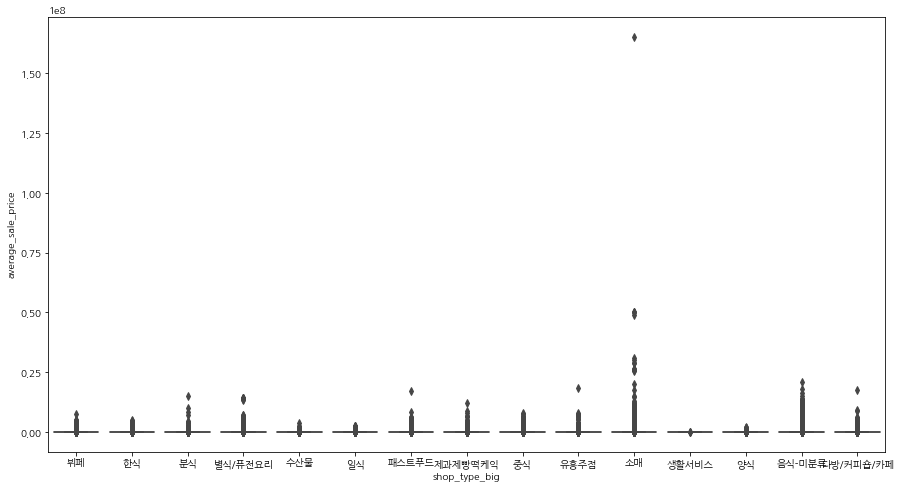

In [84]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='average_sale_price', data=df_check)

다방/커피숍/카페         AxesSubplot(0.1,0.736957;0.173913x0.163043)
별식/퓨전요리      AxesSubplot(0.308696,0.736957;0.173913x0.163043)
분식           AxesSubplot(0.517391,0.736957;0.173913x0.163043)
뷔페           AxesSubplot(0.726087,0.736957;0.173913x0.163043)
생활서비스             AxesSubplot(0.1,0.541304;0.173913x0.163043)
소매           AxesSubplot(0.308696,0.541304;0.173913x0.163043)
수산물          AxesSubplot(0.517391,0.541304;0.173913x0.163043)
양식           AxesSubplot(0.726087,0.541304;0.173913x0.163043)
유흥주점              AxesSubplot(0.1,0.345652;0.173913x0.163043)
음식-미분류       AxesSubplot(0.308696,0.345652;0.173913x0.163043)
일식           AxesSubplot(0.517391,0.345652;0.173913x0.163043)
제과제빵떡케익      AxesSubplot(0.726087,0.345652;0.173913x0.163043)
중식                    AxesSubplot(0.1,0.15;0.173913x0.163043)
패스트푸드            AxesSubplot(0.308696,0.15;0.173913x0.163043)
한식               AxesSubplot(0.517391,0.15;0.173913x0.163043)
dtype: object

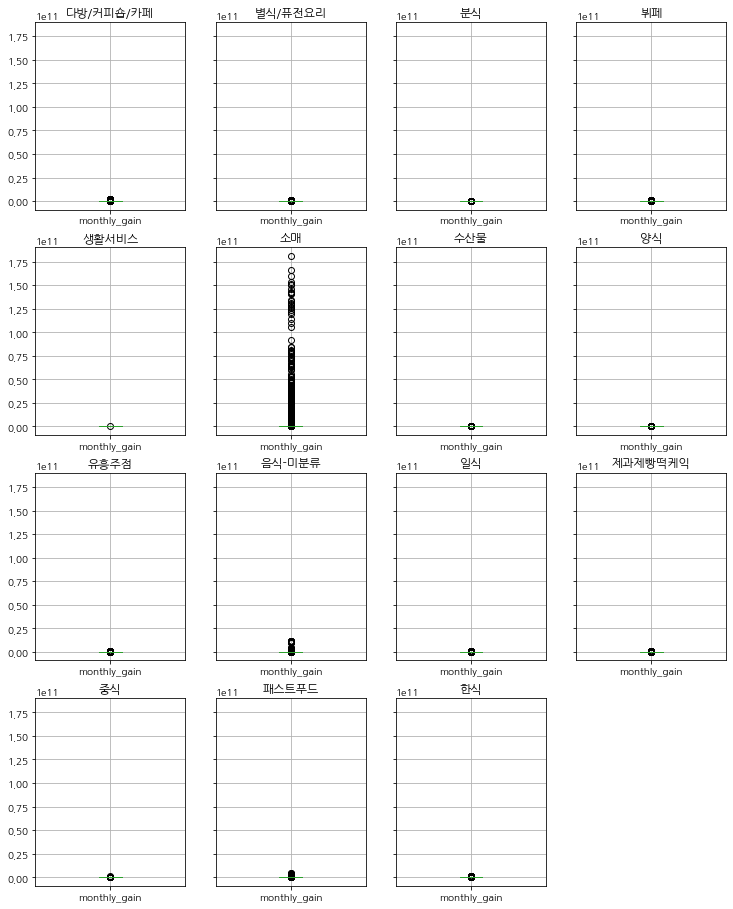

In [85]:
group_big_gain = df_check.drop(['shop_type_small', 'average_sale_price'], axis=1).groupby('shop_type_big')
group_big_gain.boxplot(figsize=(12,16))

# Preprocessing
- missing value 제거 
    - monthly_gain : 3,605 제거 -> 149,790
    - shop_type_big : 4,303 제거 -> 145,487 
    - gender feature : 1,187 -> 144,300
- shop_code, shop_name : 식별자 feature 이므로 drop 
- date : 아직은 쓸 수 없으므로 drop
    - 여기까지 총 144,300 X 27
- shop_type_big(13), shop_type_small(367) : label encodding
- longitude, latitude : clustering을 통해 labeling 후 해당 두 열은 drop 
- MinMaxSaclar 정규화 -> 정규화 column의 범위는??

In [55]:
# 원본 data와 따로 관리 -> original data = data, input data = input_data 
# feature drop
input_data = data.copy()
input_data = input_data.drop(['date', 'shop_code', 'shop_name'], axis=1)
#input_data

In [56]:
# missing value drop - monthly_gain
null_index = input_data[input_data['monthly_gain']==0].index 
print(len(null_index))

input_data = input_data.drop(null_index)
input_data

0


,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price
0,뷔페,고기 뷔페,126.844998,37.496882,12881013.37,21514
1,뷔페,고기 뷔페,127.096574,37.505706,33931612.72,52264
2,뷔페,고기 뷔페,126.906290,37.518280,21456513.16,42656
3,뷔페,고기 뷔페,127.109240,37.501153,6140707.30,34561
4,뷔페,고기 뷔페,126.980601,37.518535,6091482.50,38423
...,...,...,...,...,...,...
2927734,수산물,회/수산물 일반,126.963825,37.526863,13693767.90,21511
2927735,수산물,회/수산물 일반,127.070132,37.536551,17432801.29,74559
2927736,수산물,회/수산물 일반,127.033712,37.559118,17023101.74,34212
2927737,수산물,회/수산물 일반,127.127448,37.537151,31533908.77,52973


In [57]:
# missing value drop - average_sale_price
null_index = input_data[input_data['average_sale_price'].isnull()==True].index
print(len(null_index))

input_data = input_data.drop(null_index)
input_data

0


,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price
0,뷔페,고기 뷔페,126.844998,37.496882,12881013.37,21514
1,뷔페,고기 뷔페,127.096574,37.505706,33931612.72,52264
2,뷔페,고기 뷔페,126.906290,37.518280,21456513.16,42656
3,뷔페,고기 뷔페,127.109240,37.501153,6140707.30,34561
4,뷔페,고기 뷔페,126.980601,37.518535,6091482.50,38423
...,...,...,...,...,...,...
2927734,수산물,회/수산물 일반,126.963825,37.526863,13693767.90,21511
2927735,수산물,회/수산물 일반,127.070132,37.536551,17432801.29,74559
2927736,수산물,회/수산물 일반,127.033712,37.559118,17023101.74,34212
2927737,수산물,회/수산물 일반,127.127448,37.537151,31533908.77,52973


In [58]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

input_data['shop_type_big'] = le.fit_transform(list(input_data['shop_type_big']))   # fit transform으로 한번에 처리 가능
le.classes_

le = LabelEncoder()

input_data['shop_type_small'] = le.fit_transform(list(input_data['shop_type_small'])) 
le.classes_

array(['고기 뷔페', '고기구이/육회 전문점', '곱창/양구이 전문점', '구내식당', '국수/수제비 전문점',
       '기타세계요리 전문점', '낙지/문어/오징어/쭈꾸미 전문점', '냉면 전문점', '덮밥/가정식',
       '도너츠/꽈배기/고로케/호떡 전문점', '도시락/컵밥/주먹밥/배달음식 전문점', '돈가스 전문점', '떡/한과 전문점',
       '마라/양꼬치/훠궈 전문점', '면 전문점', '미분류 유흥업소', '민속주점', '바닷가재/게요리 전문점',
       '반찬 판매', '백화점', '버거 전문점', '베트남음식 전문점', '보쌈/족발 전문점', '분식 전문점',
       '샌드위치/토스트/핫도그 전문점', '샤브샤브 전문점', '세탁소', '소주방/포장마차', '순대 전문점',
       '슈퍼/잡화/할인매장', '스테이크 전문점', '식료품', '아이스크림/빙수 판매', '오리/닭요리 전문점',
       '오리/닭요리/탕/백숙 전문점', '와인/칵테일/위스키 바', '음식-미분류', '이자까야/꼬치구이',
       '이태리 전문점', '인도음식 전문점', '일반 중식당', '장어 전문점', '전통찻집', '제과/제빵 전문점',
       '조개 전문점', '종합 뷔페', '죽요리 전문점', '참치 전문점', '초밥 전문점', '치킨/닭강정 전문점',
       '카레 전문점', '카페/디저트', '테이크아웃 음료 전문점', '편의점', '퓨전음식 전문점', '피자 전문점',
       '한식국물요리 전문점', '한정식/백반 전문점', '호프/맥주', '화로구이 전문점', '회/수산물 일반'],
      dtype='<U19')

In [59]:
# Labeling - KMeans Clustering 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9).fit(input_data[['latitude', 'longitude']])
kmeans.cluster_centers_
kmeans.labels_

array([7, 5, 4, ..., 0, 5, 4])

In [60]:
# longitude + latitude = geo 
# So we get inpute_data = 2,927,739 rows × 5 columns
input_data['geo'] = kmeans.labels_

Text(0.5, 1.0, 'k-mean')

C:\Users\Hyeongbin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


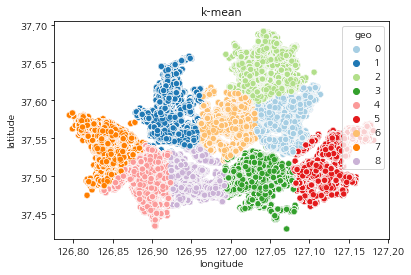

In [62]:
sns.scatterplot(x='longitude' , y='latitude', hue="geo", data=input_data, palette="Paired")
plt.title('k-mean')

In [ ]:
input_data = input_data.drop(['longitude', 'latitude'], axis=1)
input_data

In [19]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
from 

#scaler = MinMaxScaler()

#scale_cols = input_data.columns.tolist()
#scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(scaled_data)
#scaled_data.columns = scale_cols 

#input_data = scaled_data
#input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,0.571429,0.839237,0.128587,0.843021,0.000051,0.000121,0.0958,0.0543,0.1868,0.046295,...,0.1715,0.1192,0.0634,0.0115,0.7278,0.2314,0.0293,0.0000,0.0000,0.0000
1,0.571429,0.953678,0.598197,0.143170,0.000077,0.000176,0.0508,0.1212,0.0968,0.081492,...,0.1938,0.1635,0.1082,0.0083,0.7682,0.1325,0.0909,0.0000,0.0000,0.0000
2,0.571429,0.046322,0.610510,0.127312,0.000936,0.000881,0.1051,0.0964,0.0405,0.035696,...,0.2118,0.2159,0.1804,0.0464,0.0850,0.0240,0.1867,0.5005,0.0984,0.0589
3,0.571429,0.046322,0.610510,0.127312,0.000874,0.000853,0.1210,0.1148,0.0631,0.047695,...,0.2608,0.2260,0.1551,0.0268,0.0809,0.0577,0.1015,0.5461,0.1625,0.0245
4,0.357143,0.471390,0.006469,0.282728,0.001143,0.001116,0.1504,0.1048,0.1690,0.095590,...,0.1644,0.1038,0.2271,0.0043,0.2638,0.3920,0.2530,0.0869,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149785,0.928571,0.891008,0.685052,0.392348,0.000206,0.013529,0.0000,0.0000,0.2535,0.228177,...,0.2648,0.0000,0.0000,0.7352,0.2648,0.0000,0.0000,0.0000,0.0000,0.0000
149786,0.357143,0.983651,0.717663,0.383997,0.000014,0.000407,0.0000,0.0000,0.4648,0.447155,...,0.0530,0.2318,0.2053,0.2318,0.5265,0.1358,0.1060,0.0000,0.0000,0.0000
149787,0.357143,0.711172,0.788293,0.175261,0.002829,0.000480,0.3127,0.1462,0.0913,0.029097,...,0.1302,0.1371,0.1384,0.0660,0.4494,0.3645,0.1201,0.0000,0.0000,0.0000
149788,0.714286,0.525886,1.000000,0.228566,0.000716,0.000120,0.2315,0.1809,0.0960,0.099290,...,0.1042,0.1171,0.1684,0.0445,0.2570,0.3000,0.2270,0.1661,0.0055,0.0000


C:\Users\Hyeongbin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


2.528132e+05    67
2.482178e+05    64
2.530473e+05    63
2.513737e+05    63
2.533015e+05    62
                ..
2.761393e+06     1
1.998409e+06     1
2.776185e+06     1
2.392145e+08     1
3.399279e+07     1
Name: monthly_gain, Length: 2863443, dtype: int64


C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


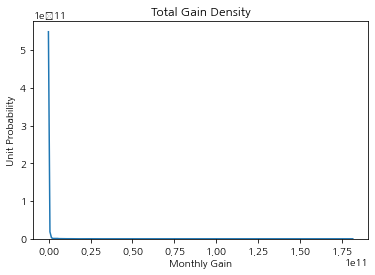

In [44]:
ax = plt.subplots()
ax = sns.distplot(input_data['monthly_gain'], hist=False)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['monthly_gain'].value_counts())

# Data Split

In [98]:
input_data_y = input_data['monthly_gain'].copy()
input_data_X = input_data.drop(['monthly_gain'], axis=1)

In [99]:
from sklearn.model_selection import train_test_split

tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)      
print(len(test_X))

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_X, 
    tr_val_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42) 

print(len(train_X))
print(len(valid_X))

28860
92352
23088


# Modeling
- XGB
- LGBM

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from lightgbm import plot_importance 
from xgboost import XGBRegressor
from xgboost import plot_importance

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [101]:
model_xgb = XGBRegressor()

model_xgb.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)],verbose=True)
pred_xgb = model_xgb.predict(test_X)

[0]	validation_0-rmse:827187392.00000
[1]	validation_0-rmse:715785984.00000
[2]	validation_0-rmse:665022208.00000
[3]	validation_0-rmse:588599616.00000
[4]	validation_0-rmse:565434368.00000
[5]	validation_0-rmse:478605696.00000
[6]	validation_0-rmse:447121056.00000
[7]	validation_0-rmse:438047360.00000
[8]	validation_0-rmse:431852320.00000
[9]	validation_0-rmse:426218880.00000
[10]	validation_0-rmse:420203712.00000
[11]	validation_0-rmse:370980096.00000
[12]	validation_0-rmse:364470816.00000
[13]	validation_0-rmse:361882496.00000
[14]	validation_0-rmse:354546336.00000
[15]	validation_0-rmse:353810368.00000
[16]	validation_0-rmse:327662336.00000
[17]	validation_0-rmse:327418496.00000
[18]	validation_0-rmse:326494496.00000
[19]	validation_0-rmse:321769696.00000
[20]	validation_0-rmse:321242592.00000
[21]	validation_0-rmse:320682720.00000
[22]	validation_0-rmse:320535200.00000
[23]	validation_0-rmse:319579712.00000
[24]	validation_0-rmse:319361472.00000
[25]	validation_0-rmse:314483232.00

In [102]:
model_lgbm = LGBMRegressor()

model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)], verbose=True)
pred_lgbm = model_lgbm.predict(test_X)

[1]	valid_0's l2: 6.77142e+17
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 6.12277e+17
[3]	valid_0's l2: 5.57944e+17
[4]	valid_0's l2: 5.09364e+17
[5]	valid_0's l2: 4.76923e+17
[6]	valid_0's l2: 4.42148e+17
[7]	valid_0's l2: 4.23387e+17
[8]	valid_0's l2: 3.94005e+17
[9]	valid_0's l2: 3.70914e+17
[10]	valid_0's l2: 3.43171e+17
[11]	valid_0's l2: 3.27327e+17
[12]	valid_0's l2: 3.05406e+17
[13]	valid_0's l2: 2.92562e+17
[14]	valid_0's l2: 2.79591e+17
[15]	valid_0's l2: 2.69299e+17
[16]	valid_0's l2: 2.63678e+17
[17]	valid_0's l2: 2.56115e+17
[18]	valid_0's l2: 2.4539e+17
[19]	valid_0's l2: 2.3485e+17
[20]	valid_0's l2: 2.30916e+17
[21]	valid_0's l2: 2.19286e+17
[22]	valid_0's l2: 2.13414e+17
[23]	valid_0's l2: 2.09072e+17
[24]	valid_0's l2: 2.01629e+17
[25]	valid_0's l2: 1.96574e+17
[26]	valid_0's l2: 1.91658e+17
[27]	valid_0's l2: 1.89688e+17
[28]	valid_0's l2: 1.81193e+17
[29]	valid_0's l2: 1.79028e+17
[30]	valid_0's l2: 1.71408e+17
[31]	valid_0's l2: 

## Prediction

In [103]:
def plot_history(history):
    #hist = pd.DataFrame(history.history)
    #history['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    
    # Mean Abs Error : 평균 절대 오차, 측정값에서 오차의 크기로 측정값과 실제값과의 차이, 절대 오차의 평균  
    # -> 측정하고자 하는 값을 정확하게 측정하지 못함으로써 발생
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    
    # Mean Square Error : 평균 제곱 오차, 오차의 제복에 대한 평균을 취한 값
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()
    
def show_pred(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    
    df_result = pd.DataFrame(list(zip(true_y, pred)), columns=['true_y', 'prediction'])
    return df_result

def show_mse_rmse(test_y, pred) :
    mse = mean_squared_error(test_y, pred)
    print("mse : %f" % mse)
    
    rmse = np.sqrt(mse)
    print("rmse: %f \n" %rmse)
    
def show_prediction_error(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    error = pred - true_y
    plt.hist(error, bins=25)
    plt.xlabel("Prediction Error")
    _ = plt.ylabel("Count")
    
def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)
    
def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

In [104]:
show_pred(test_y, pred_xgb)

,true_y,prediction
0,75750.0,5612942.0
1,20662785.0,-23522720.0
2,1083600.0,-2053121.0
3,32129604.0,31077312.0
4,21083082.0,54828380.0
...,...,...
28855,63954000.0,6772626.0
28856,9737677.6,6142502.0
28857,6771669.8,15022977.0
28858,2028096.0,-2484986.0


In [105]:
show_pred(test_y, pred_lgbm)

,true_y,prediction
0,75750.0,-9.149822e+06
1,20662785.0,5.646337e+07
2,1083600.0,-2.998588e+06
3,32129604.0,3.692030e+07
4,21083082.0,6.053084e+07
...,...,...
28855,63954000.0,1.168194e+08
28856,9737677.6,3.520769e+07
28857,6771669.8,2.232150e+07
28858,2028096.0,-7.021339e+06


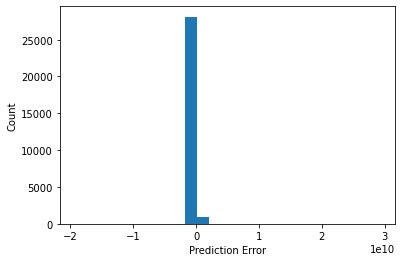

In [58]:
show_prediction_error(test_y, pred_xgb)

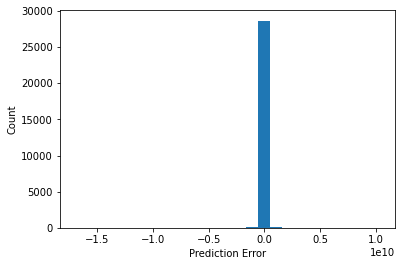

In [57]:
show_prediction_error(test_y, pred_lgbm)

In [106]:
show_mse_rmse(test_y, pred_xgb)

mse : 103459290494038640.000000
rmse: 321650882.936824 



In [107]:
show_mse_rmse(test_y, pred_lgbm)

mse : 111285923513935040.000000
rmse: 333595448.880729 



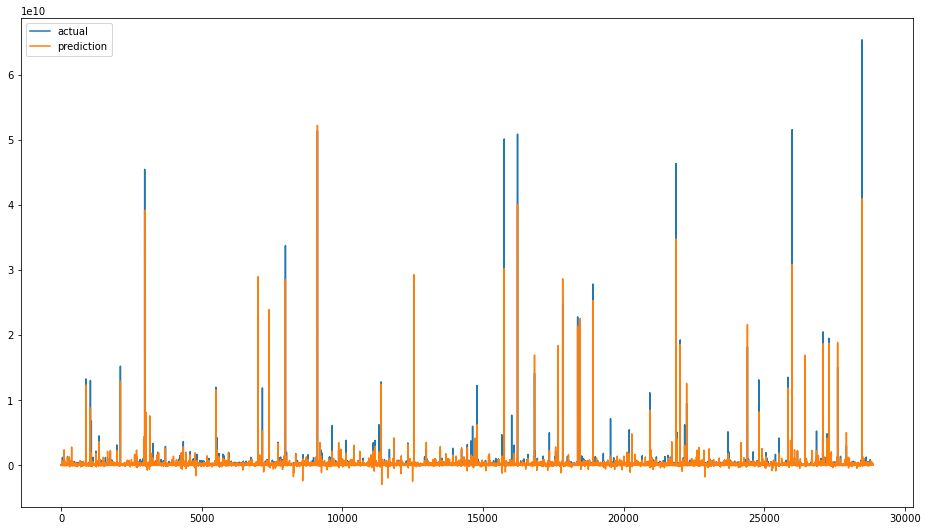

In [108]:
true_y = test_y.to_numpy()
graph(pred_xgb, true_y)

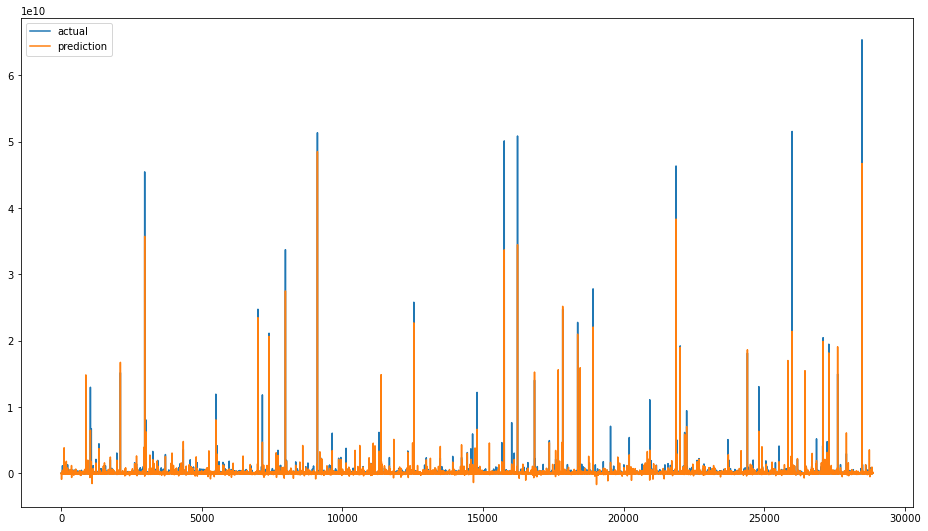

In [109]:
true_y = test_y.to_numpy()
graph(pred_lgbm, true_y)

<AxesSubplot:>

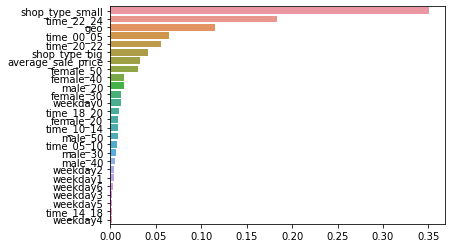

In [110]:
feature_series = pd.Series(data=model_xgb.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

<AxesSubplot:>

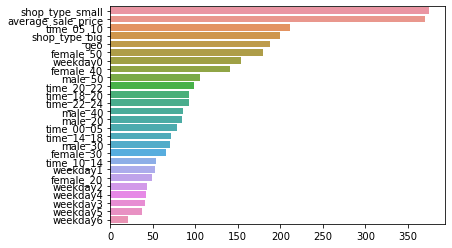

In [111]:
feature_series = pd.Series(data=model_lgbm.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)